<div style="text-align: left">CSYE 7370</div>
<div style="text-align: left">Yucong Feng</div>
<div style="text-align: left">Assignment 2</div>

# Deep Q-Learning with an Atari-like game (Or any non-toy* Open AI gym environment)

Note: I'm changing the assignment to allow only DQL with an Atari-like game as for some reason there are few tutorials on non-DQL on an Atari-like game. Creating a tutorial using non-DQL on an Atari-like game can be a mini-project. You will still have to explain the SARSA algorithm but not implement it.

*Non-toy means any but toy text or classic control is fine https://gym.openai.com/envs/Links to an external site.

 

In this assignment, you will apply Deep Q Learning to a game like any of those in the Open AI Gym Atari environments or one that you write from scratch.

https://openai.com/blog/gym-retro/Links to an external site.

https://gym.openai.com/envs/#atariLinks to an external site.

You can create your own game or find a similar Open AI Gym  environments

Useful tutorial

Deep Reinforcement Learning for Atari Games Python Tutorial | AI Plays S...
https://youtu.be/hCeJeq8U0loLinks to an external site.


1. Establish a baseline performance. How well did your Deep Q-learning do on your problem? (5 Points)Links to an external site.
For example

total_episodes = 5000
total_test_episodes = 100
max_steps = 99
learning_rate = 0.7
gamma = 0.8
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01 With this baseline performance, our RL program with the Taxi-v2 Toy text gives us a score of 8.13 which is considerably not bad.

2. What are the states, the actions, and the size of the Q-table? (5 Points)
Links to an external site.
  

3. What are the rewards? Why did you choose them? (5 Points)
Links to an external site.
 

4. How did you choose alpha and gamma in the Bellman equation? Try at least one additional value for alpha and gamma. How did it change the baseline performance?  (5 Points)
Links to an external site.
 

5. Try a policy other than e-greedy. How did it change the baseline performance? (5 Points)
Links to an external site.
 

6. How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode? (5 Points)
Links to an external site.
 

7. What is the average number of steps taken per episode? (5 Points)
Links to an external site.
8. Does Q-learning use value-based or policy-based iteration? (5 Points)
Links to an external site.
Explain, not a yes or no question. 

9. Could you use SARSA for this problem? (5 Points)
Explain, not a yes or no question. 

 

10. What is meant by the expected lifetime value in the Bellman equation?
(5 Points)
Explain, not a yes or no question. 

 

11. When would SARSA likely do better than Q-learning? (5 Points)
Explain, not a yes or no question. 

 

12. How does SARSA differ from Q-learning? (5 Points)  
Details including pseudocode and math.

 

13. Explain the Q-learning algorithm. (5 Points)  
Details including pseudocode and math. 

 

14. Explain the SARSA algorithm. (5 Points)  
Details including pseudocode and math. 

 

15. What code is yours and what have you adapted? (5 Points)
You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.

 

16. Did I explain my code clearly? (10 Points)

Your code review score will be scaled to a range of 0 to 10 and be used for this score.

 

17. Did I explain my licensing clearly? (5 Points)

Failure to cite a clear license will result in a zero for this section.

 

18. Professionalism (10 Points)

Variable naming, style guide, conduct, behavior, and attitude.

# Answer:

## 1. Introduction
Reinforcement Learning is completed by using the Deep Q-learning algorithm in the environment of the GYM library. 

The PongDeterministic-v0 game in the OpenAI GYM library has 2 major attributes:
1. 'deterministic' means that the program uses fixed sampling (every 4 frames).
2. 'v0' means that there is a 25% chance that the environment will take the last action again(used for simulation training).


Development Environment:
1. Windows10
2. Pycharm 2022.2.3
3. Python 3.9.0
4. GYM 0.17.0



### 1. Establish a baseline performance. How well did your Deep Q-learning do on your problem? (5 Points)

Here is the baseline:

    MAX_EPISODE = 400  
    // Max episode
    MAX_STEP = 10000  
    // Max step size for one episode

    MAX_MEMORY_LEN = 40000  
    // Max memory len
    MIN_MEMORY_LEN = 6000  
    // Min memory len before start train

    GAMMA = 0.8  // Discount rate
    ALPHA = 0.7  // Learning rate
    
    self.epsilon = 1  
    // Explore or Exploit
    EPSILON_DECAY = 0.99  
    // Epsilon decay rate by step
    self.epsilon_minimum = 0.05  
    // Minimum for Explore
    
After training, It can be seen that:
1. under the environment of the baseline, there was almost no improvement in training.
2. the opponent won with crushing strength.

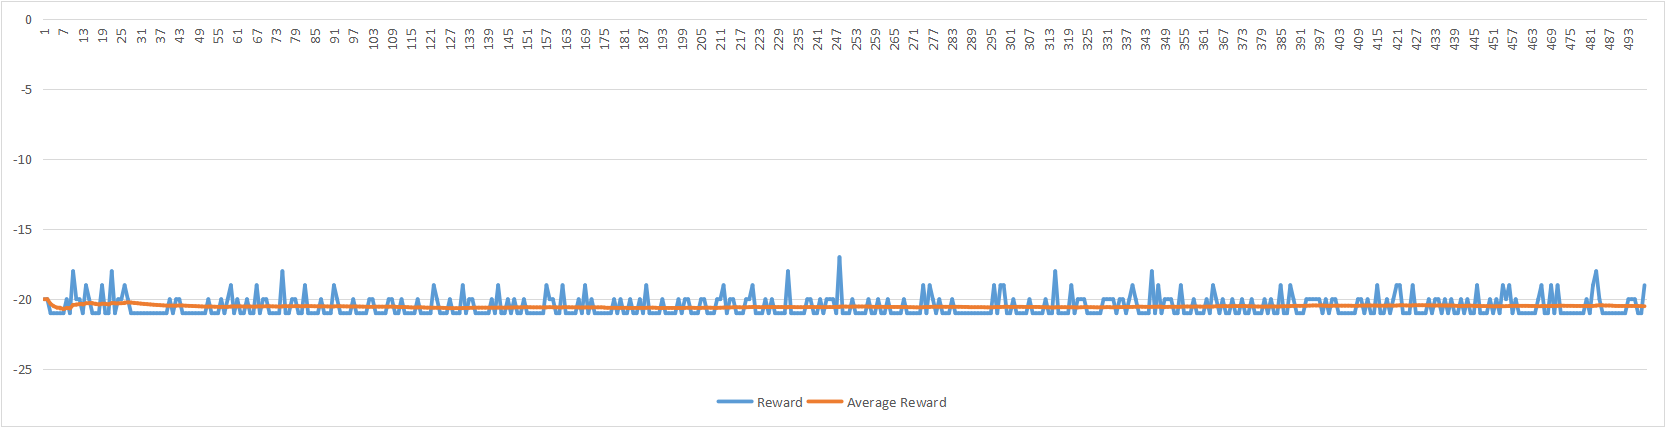

### 2. What are the states, the actions, and the size of the Q-table? (5 Points)

1. States:

    In the GYM environment, the state is an RGB image of the screen, which is an array of shape (210,160,3). Images are selected every 4 frames in a episode.

2. Actions:

    The actions are in range [0,1,2,3,4,5], which has the corresponding names ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']. In which, 0 & 1 are staying, 2 & 4 make the green player go up/go up fire, and 3 & 5 make the green player go down/go down fire.<br>

*And the following is the result of coding about explaining what is actions and states:*
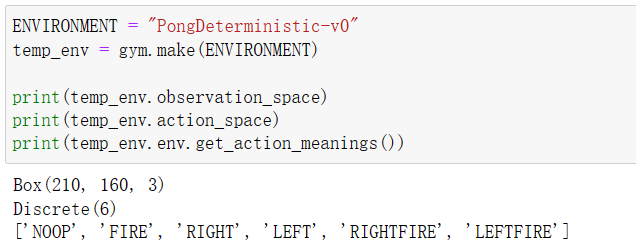

3. The size of the Q-table: 

    The Q-table is based on the size of distinct states(S-table) and actions(A-table).

    **The size of the Q-table = the size of S * the size of A**.  
    The states has 210 * 160 pixels, and each pixel has 128 possible colors:
    
    So the size of the Q-table is 210 * 160 * 128 * 6 = 25,804,800
    
    

### 3. What are the rewards? Why did you choose them? (5 Points)

Rewards: Green player's score -(minus) the Red player's scores. (Range:[-21, 21])

Reason: 

1. There is only one round in one epoch, there is no any extra calculations needed to do.
2. It's easy to calculate the average reward for the last 100 rounds as a scoring ability.

### 4. How did you choose alpha and gamma in the Bellman equation? Try at least one additional value for alpha and gamma. How did it change the baseline performance? (5 Points)

1. Alpha: Alpha is the learning rate that represents how important the learned Q-value is. The bigger the Alpha is, the more degree of reference to accept new Q-value.
2. Gamma: Gamma is the discount factor that represents how important the future/next Q-value is. The bigger the Gamma is, Q-value for next state/future Q-value is more acceptable.

Alpha in assignment:

**Alpha:** Assumed the smaller Alpha(0.00025, to be precise), which means lower learning rate.

    GAMMA = 0.8  // Old Discount rate
    // ALPHA = 0.7  // Old Learning rate
    ALPHA = 0.00025 // New Learning rate
    
The learning rate is changed from 0.7 to 0.00025. The smaller learning rate performs better learning result. 

According to the Bellman equation:
1. if the learning rate is large, the model will learn these useless states, and those state that are really useful is covered by a large number of useless states and cannot be extracted smoothly, causing the model to fail to fit successfully, and it will be maintained at a high loss.
2. if a smaller learning rate is used, the model will be affected because the new Q-value is filtered, the selection of new Q-value is more cautious, thus improving the rewards of the whole experiment.
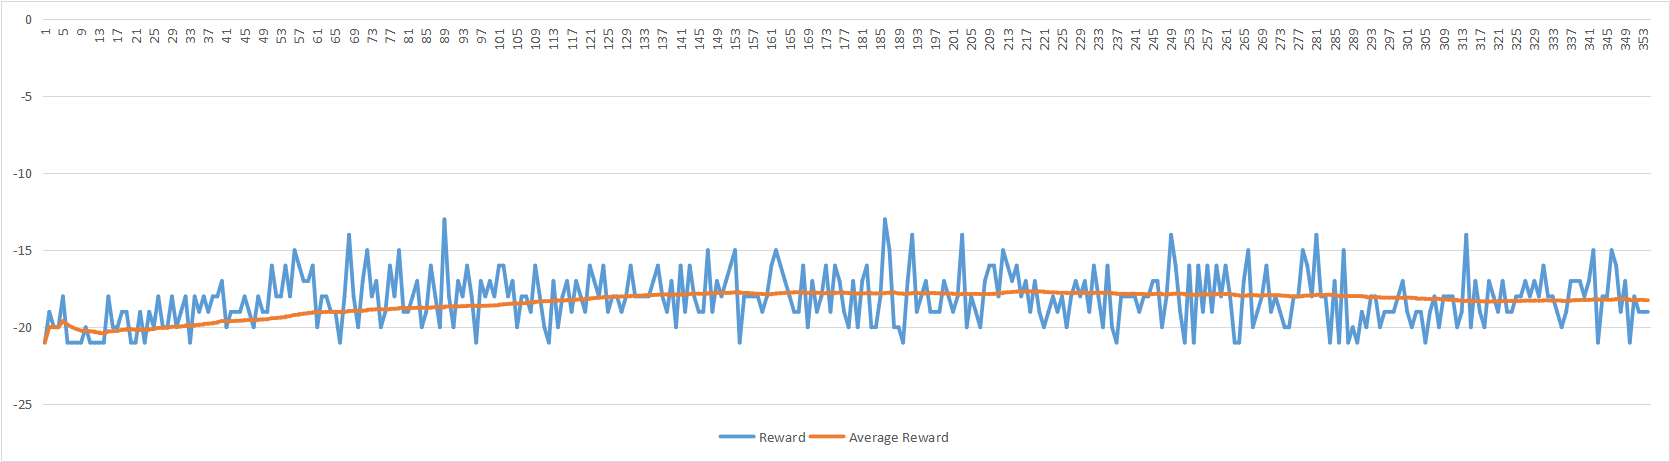
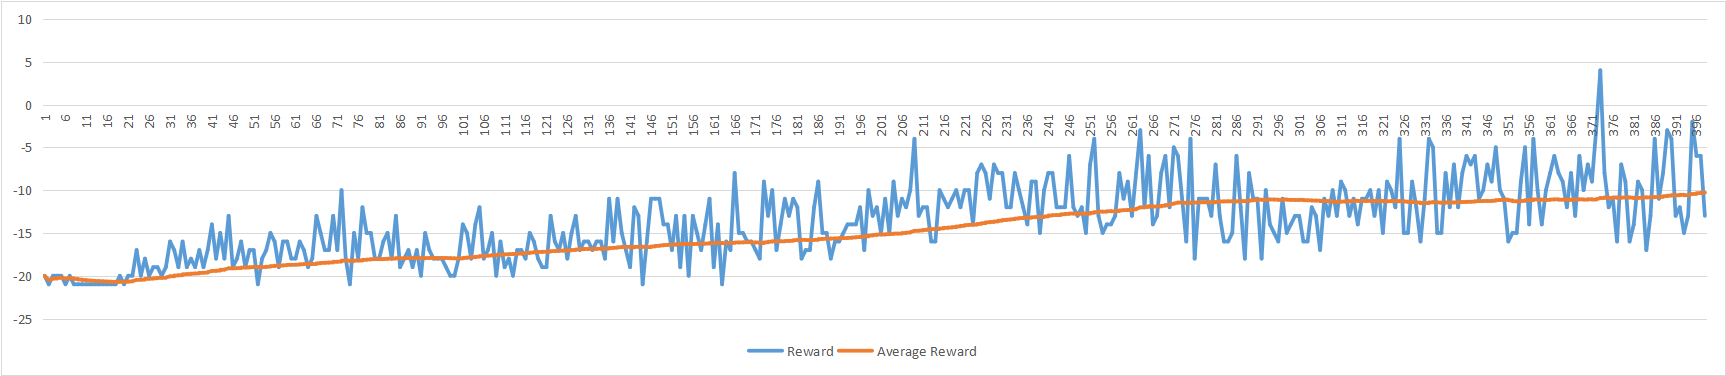

### 5. Try a policy other than e-greedy. How did it change the baseline performance? (5 Points)

I used **random sampling method** as a new policy and the result is underneath:

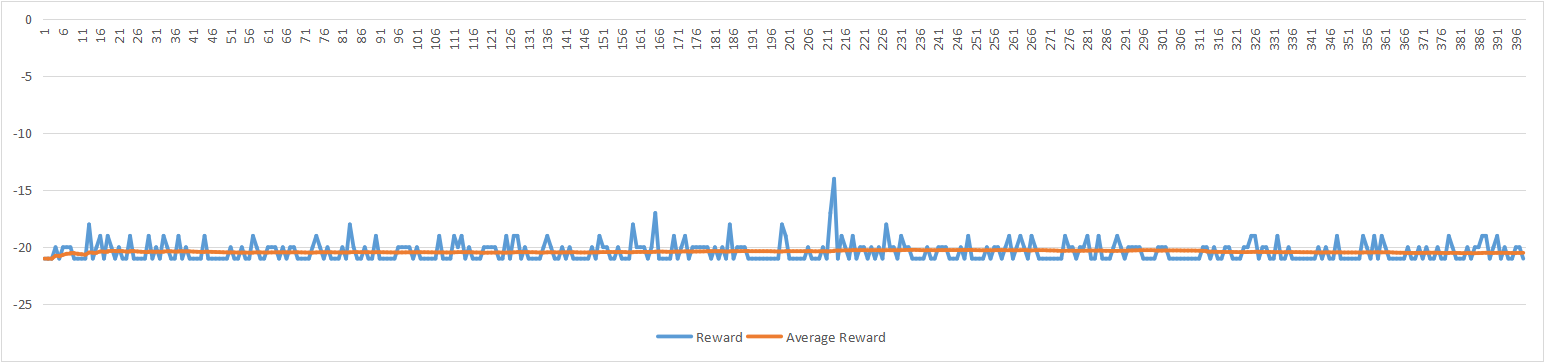

According to the experiment, the ramdom sampling is **-20.460**, but the baseline is **-20.480**. It shows that:
1. The random sampling policy is only 0.098% better than the baseline performance.
2. The learning result of the ramdom sampling policy is similar to the baseline performance with e-greed within 500 epochs.


### 6. How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode? (5 Points)

1. ***How did you choose your decay rate and starting epsilon?***

1. By setting the starting epsilon to 1.
2. And as the step rises, it will fall at the rate of decay rate = 0.99 until it drops to **0.05**.

Epsilon is a hyperparameter of the e-greedy algorithm:
    The larger the epsilon, the more exploration the program will do. 

At the end of the stimulation, the program still needs a certain small epsilon value(0.05) to explore new actions, but in most cases the program will choose right actions it has learned before.

2. ***Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance?***

By setting the decay rate to 1, which means that epsilon will always be 1. 

In this case, the algorithm will never execute the exploitation part, it will always go to explore new actions.

In this program, this means that the algorithm uses the random sampling policy, which makes the learned model unable to converge, and the learning result is same as the baseline performance.

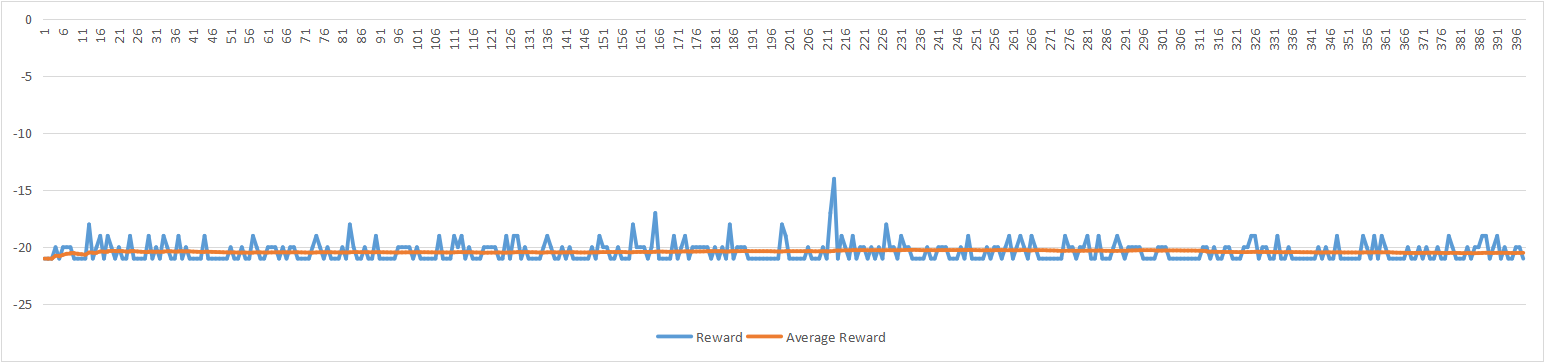

3. ***What is the value of epsilon when if you reach the max steps per episode?***

In this program, since we set the MAX_STEP to 10000, after repeated calculations, it can be concluded that in this GYM environment, the steps are around 6500 and will never exceed 10000, and we set the minimum value of epsilon to 0.05. Since in each step, the value of epsilon will be multiplied by the decay rate, so in the end the value of epsilon will drop to 0.05. And we can take the baseline situation(According to the experiment results, it has the minimum number of steps in each epoch in whole experiments) to prove that. In baseline performance, the value of epsilon of each epoch almost all dropped to 0.05(Except for the first 30 epochs, because the model needs a certain time to initialize and accumulate learning data), which proves our interpretation is correct. Plus, we can also assume that the steps exceed the MXA_STEP limit, in which case the value of epsilon is equal to the initial value of epsilon times the value of MAX_STEP.

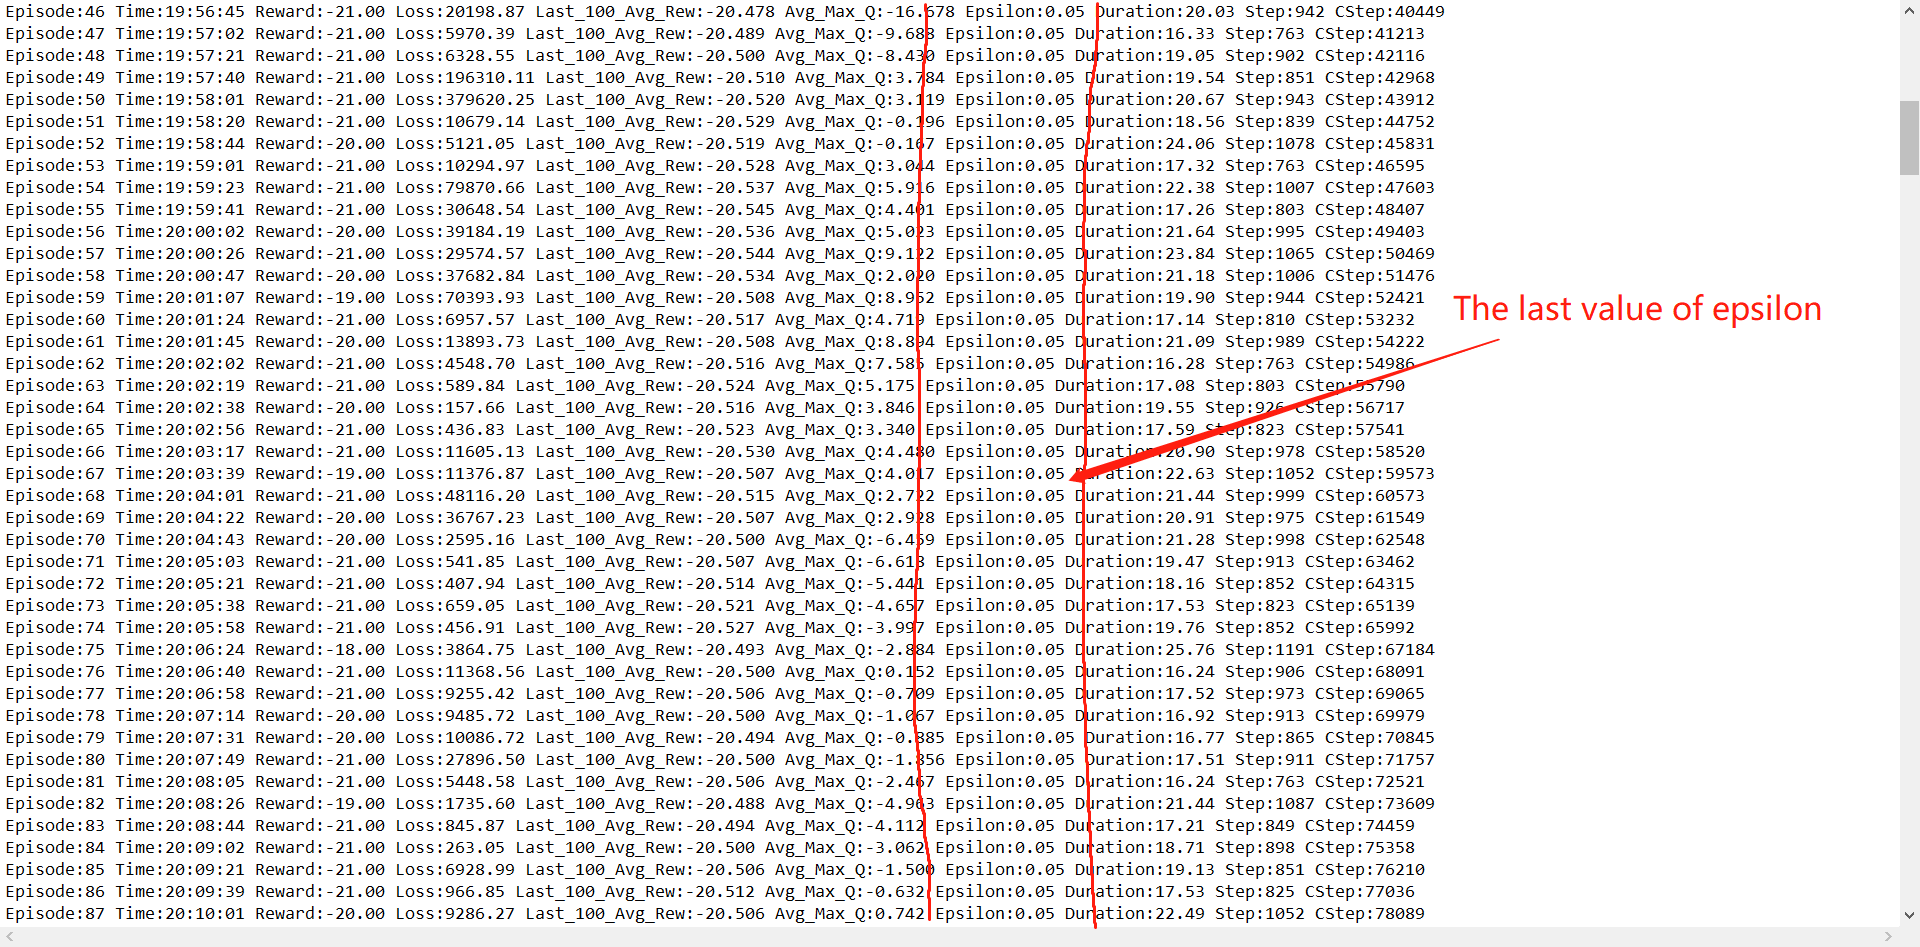

### 7. What is the average number of steps taken per episode? (5 Points)

Given below are the results of steps per epoch with the best parameters.

It can be seen that the change of steps in each round is not stable. This is the result of insufficient model training. 

However, there is still a positive growth trend as a whole:
        If we continue to train, we can infer that it will continue to grow, but it must remain basically stable in the end, because after the model is fully trained, the useless actions will be gradually discarded by the model, and it will learn all correct actions in this GYM environment. 

**Conclusion**: From the result within the training range of this experiment, the average number of steps is 2091.346734.

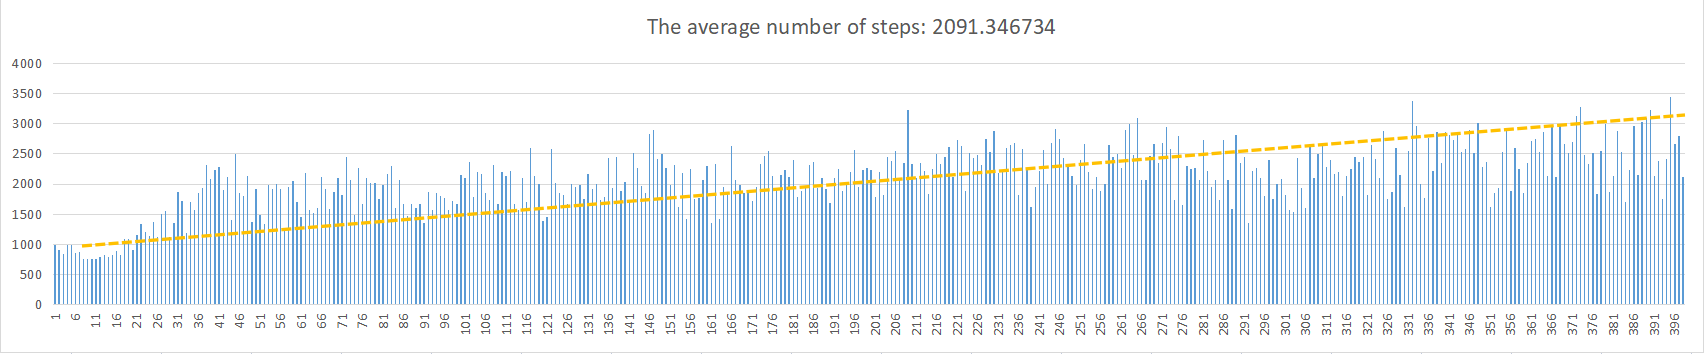

### 8. Does Q-learning use value-based or policy-based iteration? (5 Points) Explain, not a yes or no question. 

Yes, Q-learning uses value-based iteration.

**Explanation:** It uses the Bellman equation to compute the optimal MDP policy and its value. 

In the training, the algorithm iterates until updating value function finds the optimal value. 

The policy that follows the optimal value will be optimal policy. This is also the foundation of Q-learning.

### 9. Could you use SARSA for this problem? (5 Points) Explain, not a yes or no question. 

Yes, SARSA can be used.

**Explanation:** SARSA is also calculating by using Q-table and e-greedy policy. 

It differs from Q-learning only in the method of updating the Q-value. 

As the Q-learning works for this problem, then SARSA also works for it.

### 10. What is meant by the expected lifetime value in the Bellman equation? (5 Points) Explain, not a yes or no question. 

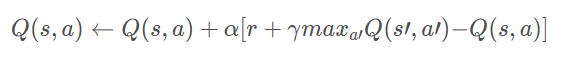

**Bellman equation:**
The expected lifetime Q-value in the state s with the action a(the left of arrow sign) is the **total max** reward. 

1. Calculating the sum of immediate reward and the result of the discount factor gamma multiplied by each max future reward. 
2. Then multiply the summed value by the learning rate alpha, and then add the previously accumulated reward. 
3. The last result we get is the expected lifetime Q-value. It could measure how good the action a is with the state s.

### 11. When would SARSA likely do better than Q-learning? (5 Points) Explain, not a yes or no question. 

1. Q-learning is to obtain the optimal policy.

2. SARSA learns the near-optimal policy during exploration. 


**Explanation:** If there is a large negative reward close to the optimal path, Q-learning will tend to explore that, while SARSA is more like to exploit the previous policy. So when people prefer caring about the loss while training a model, SARSA will be better than Q-learning to exploit the previous data.

### 12. How does SARSA differ from Q-learning? (5 Points) Explain, not a yes or no question.


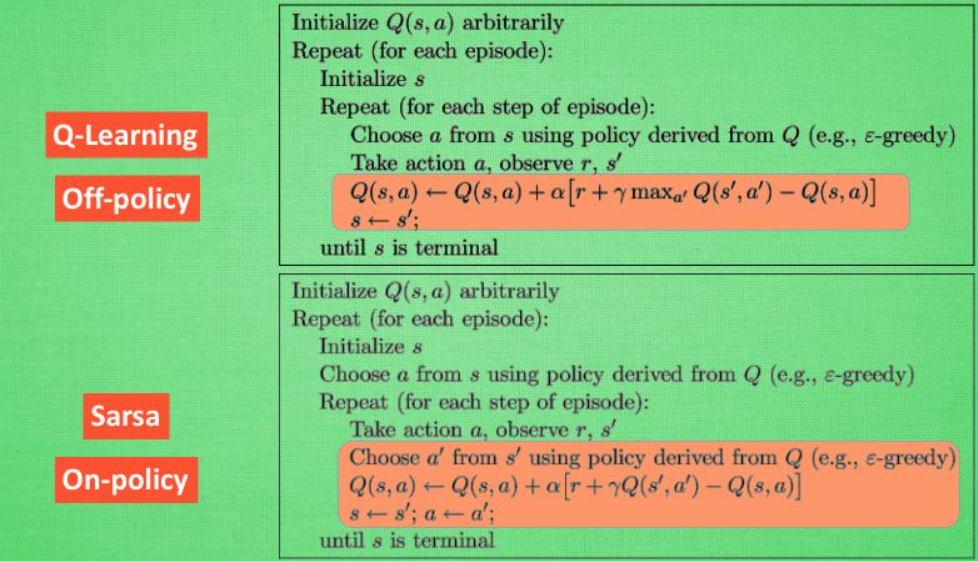

1. Q-learning chooses the action with the largest Q-value after calculating and comparing all the actions, but SARSA will not change its mind and choose the action following its policy(e-greedy).

2. The order to get the Q-value. The Q-learning algorithm, first using policy(e-greedy) to judge the category of actions(explore or exploit) in current state, then update Q-value for choosing the maximum reward. The choosing is controlled by a policy(e-greedy). SARSA algorithm first confirms the action through an e-greedy policy and then updates the Q-value according to the executed action.

### 13. Explain the Q-learning algorithm. (5 Points) Details including pseudocode and math.

Q-learning is an off-policy algorithm, uses ***value-based*** iteration. It is to learn the Q-value of a specific state under a specific action. It will build a **Q-Table** with states as the row and actions as the column, and then update the Q-Table by the rewards in each step to choose the action with max total discounted rewards. 

In each step: 
1. first using e-greedy policy to judge the category of actions(explore/exploit) in current state, 
2. then update Q-value for choosing the maximum reward. The choosing is controlled by e-greedy.

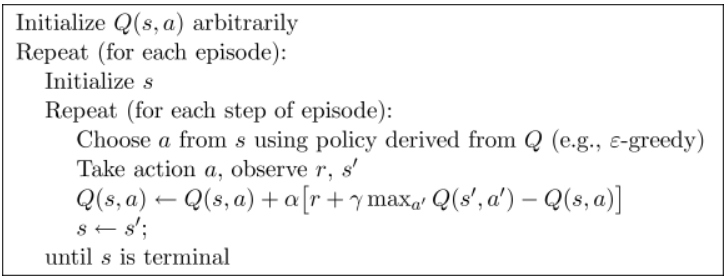


### 14. Explain the SARSA algorithm. (5 Points) Details including pseudocode and math. 
As Q-learning policy, **SARSA**(State-Action-Reward-State-Action) also uses 
1. Q-table
2. e-greedy policy 

to make a strategic decision. But it is an on-policy algorithm with e-greedy policy. 

In each step, it first confirms the action through an e-greedy policy and then updates the Q-value according to the executed action.

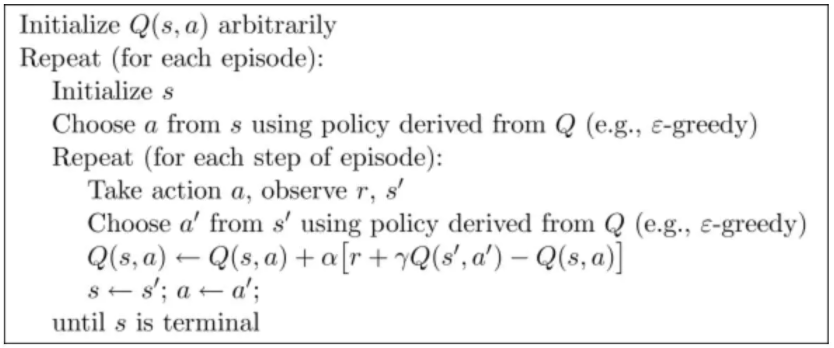


### 15. What code is yours and what have you adapted? (5 Points)

Deep Q-learning on github by **Behçet Şentürk**: https://github.com/bhctsntrk/OpenAIPong-DQN

What I did :
1. Changed the initial hypermetwes and did multiple trainings to get different results to match requirements.
2. Wrote the method about the final extraction and post-processing part of the experimental data results.

### 16. Did I explain my code clearly? (10 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.

Yes. Please check the comment below.

### 17. Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.

Yes, I am sure that I explained my licensing clearly, I also put this in the zipped folder.

    MIT License

    Copyright (c) 2022 Yucong Feng

    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
    OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
    SOFTWARE.


## Code:

**Initialization and Training part:**

In [1]:
import gym
import cv2

import time
import json
import random
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from collections import deque

In [2]:
ENVIRONMENT = "PongDeterministic-v0"
temp_env = gym.make(ENVIRONMENT)

print(temp_env.observation_space)
print(temp_env.action_space)
print(temp_env.env.get_action_meanings())

Box(210, 160, 3)
Discrete(6)
['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


In [3]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SAVE_MODELS = True  # Save models to file so you can test later
MODEL_PATH = "./models/optimal/LRandDR/pong-LRandDR-"  # Models path for saving or loading
SAVE_MODEL_INTERVAL = 10  # Save models at every X epoch
TRAIN_MODEL = True  # Train model while playing (Make it False when testing a model)

LOAD_MODEL_FROM_FILE = False  # Load model from file
LOAD_FILE_EPISODE = 285  # Load Xth episode from file

BATCH_SIZE = 64  # Minibatch size that select randomly from mem for train nets
# MAX_EPISODE = 5000  # Max episode
MAX_EPISODE = 400  # Max episode
MAX_STEP = 10000  # Max step size for one episode

MAX_MEMORY_LEN = 40000  # Max memory len
MIN_MEMORY_LEN = 6000  # Min memory len before start train

# GAMMA = 0.8  # Old Discount rate
GAMMA = 0.97  # New Discount rate
# ALPHA = 0.7  # Old Learning rate
ALPHA = 0.00025  # New Learning rate
EPSILON_DECAY = 0.99  # Epsilon decay rate by step
# EPSILON_DECAY = 1  # Epsilon decay rate by step

RENDER_GAME_WINDOW = True  # Opens a new window to render the game (Won't work on colab default)

In [4]:
class DuelCNN(nn.Module):
    """
    CNN with Duel Algo. https://arxiv.org/abs/1511.06581
    """
    def __init__(self, h, w, output_size):
        super(DuelCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=4,  out_channels=32, kernel_size=8, stride=4)
        self.bn1 = nn.BatchNorm2d(32)
        convw, convh = self.conv2d_size_calc(w, h, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2)
        self.bn2 = nn.BatchNorm2d(64)
        convw, convh = self.conv2d_size_calc(convw, convh, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
        self.bn3 = nn.BatchNorm2d(64)
        convw, convh = self.conv2d_size_calc(convw, convh, kernel_size=3, stride=1)

        linear_input_size = convw * convh * 64  # Last conv layer's out sizes

        # Action layer
        self.Alinear1 = nn.Linear(in_features=linear_input_size, out_features=128)
        self.Alrelu = nn.LeakyReLU()  # Linear 1 activation funct
        self.Alinear2 = nn.Linear(in_features=128, out_features=output_size)

        # State Value layer
        self.Vlinear1 = nn.Linear(in_features=linear_input_size, out_features=128)
        self.Vlrelu = nn.LeakyReLU()  # Linear 1 activation funct
        self.Vlinear2 = nn.Linear(in_features=128, out_features=1)  # Only 1 node

    def conv2d_size_calc(self, w, h, kernel_size=5, stride=2):
        """
        Calcs conv layers output image sizes
        """
        next_w = (w - (kernel_size - 1) - 1) // stride + 1
        next_h = (h - (kernel_size - 1) - 1) // stride + 1
        return next_w, next_h

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))

        x = x.view(x.size(0), -1)  # Flatten every batch

        Ax = self.Alrelu(self.Alinear1(x))
        Ax = self.Alinear2(Ax)  # No activation on last layer

        Vx = self.Vlrelu(self.Vlinear1(x))
        Vx = self.Vlinear2(Vx)  # No activation on last layer

        q = Vx + (Ax - Ax.mean())

        return q

In [5]:
class Agent:
    def __init__(self, environment):
        """
        Hyperparameters definition for Agent
        """
        # State size for breakout env. SS images (210, 160, 3). Used as input size in network
        self.state_size_h = environment.observation_space.shape[0]
        self.state_size_w = environment.observation_space.shape[1]
        self.state_size_c = environment.observation_space.shape[2]

        # Activation size for breakout env. Used as output size in network
        self.action_size = environment.action_space.n

        # Image pre process params
        self.target_h = 80  # Height after process
        self.target_w = 64  # Widht after process

        self.crop_dim = [20, self.state_size_h, 0, self.state_size_w]  # Cut 20 px from top to get rid of the score table

        # Trust rate to our experiences
        self.gamma = GAMMA  # Discount coef for future predictions
        self.alpha = ALPHA  # Learning Rate

        # After many experinces epsilon will be 0.05
        # So we will do less Explore more Exploit
        self.epsilon = 1  # Explore or Exploit
        self.epsilon_decay = EPSILON_DECAY  # Adaptive Epsilon Decay Rate
        self.epsilon_minimum = 0.05  # Minimum for Explore

        # Deque holds replay mem.
        self.memory = deque(maxlen=MAX_MEMORY_LEN)

        # Create two model for DDQN algorithm
        self.online_model = DuelCNN(h=self.target_h, w=self.target_w, output_size=self.action_size).to(DEVICE)
        self.target_model = DuelCNN(h=self.target_h, w=self.target_w, output_size=self.action_size).to(DEVICE)
        self.target_model.load_state_dict(self.online_model.state_dict())
        self.target_model.eval()

        # Adam used as optimizer
        self.optimizer = optim.Adam(self.online_model.parameters(), lr=self.alpha)

    def preProcess(self, image):
        """
        Process image crop resize, grayscale and normalize the images
        """
        frame = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # To grayscale
        frame = frame[self.crop_dim[0]:self.crop_dim[1], self.crop_dim[2]:self.crop_dim[3]]  # Cut 20 px from top
        frame = cv2.resize(frame, (self.target_w, self.target_h))  # Resize
        frame = frame.reshape(self.target_w, self.target_h) / 255  # Normalize

        return frame

    def act(self, state):
        """
        Get state and do action
        Two option can be selectedd if explore select random action
        if exploit ask nnet for action
        """

        act_protocol = 'Explore' if random.uniform(0, 1) <= self.epsilon else 'Exploit'

        if act_protocol == 'Explore':
            action = random.randrange(self.action_size)
        else:
            with torch.no_grad():
                state = torch.tensor(state, dtype=torch.float, device=DEVICE).unsqueeze(0)
                q_values = self.online_model.forward(state)  # (1, action_size)
                action = torch.argmax(q_values).item()  # Returns the indices of the maximum value of all elements

        return action

    def train(self):
        """
        Train neural nets with replay memory
        returns loss and max_q val predicted from online_net
        """
        if len(agent.memory) < MIN_MEMORY_LEN:
            loss, max_q = [0, 0]
            return loss, max_q
        # We get out minibatch and turn it to numpy array
        state, action, reward, next_state, done = zip(*random.sample(self.memory, BATCH_SIZE))

        # Concat batches in one array
        # (np.arr, np.arr) ==> np.BIGarr
        state = np.concatenate(state)
        next_state = np.concatenate(next_state)

        # Convert them to tensors
        state = torch.tensor(state, dtype=torch.float, device=DEVICE)
        next_state = torch.tensor(next_state, dtype=torch.float, device=DEVICE)
        action = torch.tensor(action, dtype=torch.long, device=DEVICE)
        reward = torch.tensor(reward, dtype=torch.float, device=DEVICE)
        done = torch.tensor(done, dtype=torch.float, device=DEVICE)

        # Make predictions
        state_q_values = self.online_model(state)
        next_states_q_values = self.online_model(next_state)
        next_states_target_q_values = self.target_model(next_state)

        # Find selected action's q_value
        selected_q_value = state_q_values.gather(1, action.unsqueeze(1)).squeeze(1)
        # Get indice of the max value of next_states_q_values
        # Use that indice to get a q_value from next_states_target_q_values
        # We use greedy for policy So it called off-policy
        next_states_target_q_value = next_states_target_q_values.gather(
            1, next_states_q_values.max(1)[1].unsqueeze(1)).squeeze(1)
        # Use Bellman function to find expected q value
        expected_q_value = reward + self.gamma * next_states_target_q_value * (1 - done)

        # Calc loss with expected_q_value and q_value
        loss = (selected_q_value - expected_q_value.detach()).pow(2).mean()

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss, torch.max(state_q_values).item()

    def storeResults(self, state, action, reward, nextState, done):
        """
        Store every result to memory
        """
        self.memory.append([state[None, :], action, reward, nextState[None, :], done])

    def adaptiveEpsilon(self):
        """
        Adaptive Epsilon means every step
        we decrease the epsilon so we do less Explore
        """
        if self.epsilon > self.epsilon_minimum:
            self.epsilon *= self.epsilon_decay

In [6]:
if __name__ == "__main__":
    environment = gym.make(ENVIRONMENT)  # Get env
    agent = Agent(environment)  # Create Agent

    if LOAD_MODEL_FROM_FILE:
        agent.online_model.load_state_dict(torch.load(MODEL_PATH+str(LOAD_FILE_EPISODE)+".pkl"))

        with open(MODEL_PATH+str(LOAD_FILE_EPISODE)+'.json') as outfile:
            param = json.load(outfile)
            agent.epsilon = param.get('epsilon')

        startEpisode = LOAD_FILE_EPISODE + 1

    else:
        startEpisode = 1

    last_100_ep_reward = deque(maxlen=100)  # Last 100 episode rewards
    total_step = 1  # Cumulkative sum of all steps in episodes
    for episode in range(startEpisode, MAX_EPISODE):

        startTime = time.time()  # Keep time
        state = environment.reset()  # Reset env

        state = agent.preProcess(state)  # Process image

        # Stack state . Every state contains 4 time contionusly frames
        # We stack frames like 4 channel image
        state = np.stack((state, state, state, state))

        total_max_q_val = 0  # Total max q vals
        total_reward = 0  # Total reward for each episode
        total_loss = 0  # Total loss for each episode
        
        # flag = 0
        
        # print(len(agent.memory))
        for step in range(MAX_STEP):

            if RENDER_GAME_WINDOW:
                environment.render()  # Show state visually

            # Select and perform an action
            action = agent.act(state)  # Act
            next_state, reward, done, info = environment.step(action)  # Observe

            next_state = agent.preProcess(next_state)  # Process image

            # Stack state . Every state contains 4 time contionusly frames
            # We stack frames like 4 channel image
            next_state = np.stack((next_state, state[0], state[1], state[2]))

            # Store the transition in memory
            agent.storeResults(state, action, reward, next_state, done)  # Store to mem

            # Move to the next state
            state = next_state  # Update state

            if TRAIN_MODEL:
                # Perform one step of the optimization (on the target network)
                loss, max_q_val = agent.train()  # Train with random BATCH_SIZE state taken from mem
            else:
                loss, max_q_val = [0, 0]

            total_loss += loss
            total_max_q_val += max_q_val
            total_reward += reward
            total_step += 1
            if total_step % 100 == 0:
                agent.adaptiveEpsilon()  # Decrase epsilon
                
#             if done == False:
#                 flag = flag + 1
#             else:
#                 print("True!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

            if done:  # Episode completed
                currentTime = time.time()  # Keep current time
                time_passed = currentTime - startTime  # Find episode duration
                current_time_format = time.strftime("%H:%M:%S", time.gmtime())  # Get current dateTime as HH:MM:SS
                epsilonDict = {'epsilon': agent.epsilon}  # Create epsilon dict to save model as file

                if SAVE_MODELS and episode % SAVE_MODEL_INTERVAL == 0:  # Save model as file
                    weightsPath = MODEL_PATH + str(episode) + '.pkl'
                    epsilonPath = MODEL_PATH + str(episode) + '.json'

                    torch.save(agent.online_model.state_dict(), weightsPath)
                    with open(epsilonPath, 'w') as outfile:
                        json.dump(epsilonDict, outfile)

                if TRAIN_MODEL:
                    agent.target_model.load_state_dict(agent.online_model.state_dict())  # Update target model

                last_100_ep_reward.append(total_reward)
                avg_max_q_val = total_max_q_val / step

                outStr = "Episode:{} Time:{} Reward:{:.2f} Loss:{:.2f} Last_100_Avg_Rew:{:.3f} Avg_Max_Q:{:.3f} Epsilon:{:.2f} Duration:{:.2f} Step:{} CStep:{}".format(
                    episode, current_time_format, total_reward, total_loss, np.mean(last_100_ep_reward)
                    , avg_max_q_val, agent.epsilon, time_passed, step, total_step
                )

                print(outStr)
                #flag = 0

                if SAVE_MODELS:
                    outputPath = MODEL_PATH + "out" + '.txt'  # Save outStr to file
                    with open(outputPath, 'a') as outfile:
                        outfile.write(outStr+"\n")

                break

Episode:1 Time:10:33:06 Reward:-20.00 Loss:0.00 Last_100_Avg_Rew:-20.000 Avg_Max_Q:0.000 Epsilon:0.91 Duration:7.43 Step:986 CStep:988
Episode:2 Time:10:33:09 Reward:-21.00 Loss:0.00 Last_100_Avg_Rew:-20.500 Avg_Max_Q:0.000 Epsilon:0.83 Duration:3.07 Step:903 CStep:1892
Episode:3 Time:10:33:12 Reward:-20.00 Loss:0.00 Last_100_Avg_Rew:-20.333 Avg_Max_Q:0.000 Epsilon:0.76 Duration:2.77 Step:841 CStep:2734
Episode:4 Time:10:33:15 Reward:-20.00 Loss:0.00 Last_100_Avg_Rew:-20.250 Avg_Max_Q:0.000 Epsilon:0.69 Duration:3.57 Step:985 CStep:3720
Episode:5 Time:10:33:19 Reward:-20.00 Loss:0.00 Last_100_Avg_Rew:-20.200 Avg_Max_Q:0.000 Epsilon:0.62 Duration:3.46 Step:990 CStep:4711
Episode:6 Time:10:33:22 Reward:-21.00 Loss:0.00 Last_100_Avg_Rew:-20.333 Avg_Max_Q:0.000 Epsilon:0.58 Duration:2.99 Step:851 CStep:5563
Episode:7 Time:10:33:33 Reward:-20.00 Loss:14.78 Last_100_Avg_Rew:-20.286 Avg_Max_Q:0.183 Epsilon:0.53 Duration:11.60 Step:864 CStep:6428
Episode:8 Time:10:33:49 Reward:-21.00 Loss:2.74

Episode:60 Time:11:02:18 Reward:-18.00 Loss:4.24 Last_100_Avg_Rew:-18.717 Avg_Max_Q:0.625 Epsilon:0.05 Duration:37.25 Step:1700 CStep:85735
Episode:61 Time:11:02:50 Reward:-18.00 Loss:4.16 Last_100_Avg_Rew:-18.705 Avg_Max_Q:0.675 Epsilon:0.05 Duration:31.90 Step:1456 CStep:87192
Episode:62 Time:11:03:38 Reward:-16.00 Loss:4.84 Last_100_Avg_Rew:-18.661 Avg_Max_Q:0.682 Epsilon:0.05 Duration:47.76 Step:2185 CStep:89378
Episode:63 Time:11:04:12 Reward:-17.00 Loss:3.89 Last_100_Avg_Rew:-18.635 Avg_Max_Q:0.700 Epsilon:0.05 Duration:34.32 Step:1570 CStep:90949
Episode:64 Time:11:04:45 Reward:-19.00 Loss:4.08 Last_100_Avg_Rew:-18.641 Avg_Max_Q:0.700 Epsilon:0.05 Duration:33.28 Step:1516 CStep:92466
Episode:65 Time:11:05:21 Reward:-18.00 Loss:3.75 Last_100_Avg_Rew:-18.631 Avg_Max_Q:0.639 Epsilon:0.05 Duration:35.53 Step:1603 CStep:94070
Episode:66 Time:11:06:08 Reward:-13.00 Loss:4.18 Last_100_Avg_Rew:-18.545 Avg_Max_Q:0.606 Epsilon:0.05 Duration:47.04 Step:2121 CStep:96192
Episode:67 Time:11:0

Episode:119 Time:11:43:18 Reward:-18.00 Loss:4.56 Last_100_Avg_Rew:-17.220 Avg_Max_Q:0.669 Epsilon:0.05 Duration:43.30 Step:2002 CStep:197397
Episode:120 Time:11:43:49 Reward:-19.00 Loss:3.59 Last_100_Avg_Rew:-17.200 Avg_Max_Q:0.699 Epsilon:0.05 Duration:30.33 Step:1384 CStep:198782
Episode:121 Time:11:44:21 Reward:-19.00 Loss:3.79 Last_100_Avg_Rew:-17.190 Avg_Max_Q:0.714 Epsilon:0.05 Duration:31.77 Step:1450 CStep:200233
Episode:122 Time:11:45:17 Reward:-13.00 Loss:6.32 Last_100_Avg_Rew:-17.120 Avg_Max_Q:0.735 Epsilon:0.05 Duration:56.50 Step:2585 CStep:202819
Episode:123 Time:11:46:02 Reward:-16.00 Loss:5.60 Last_100_Avg_Rew:-17.110 Avg_Max_Q:0.753 Epsilon:0.05 Duration:44.40 Step:2023 CStep:204843
Episode:124 Time:11:46:42 Reward:-17.00 Loss:4.90 Last_100_Avg_Rew:-17.080 Avg_Max_Q:0.750 Epsilon:0.05 Duration:40.53 Step:1851 CStep:206695
Episode:125 Time:11:47:22 Reward:-15.00 Loss:4.75 Last_100_Avg_Rew:-17.050 Avg_Max_Q:0.729 Epsilon:0.05 Duration:39.78 Step:1812 CStep:208508
Episod

Episode:177 Time:12:26:12 Reward:-14.00 Loss:4.48 Last_100_Avg_Rew:-15.980 Avg_Max_Q:0.859 Epsilon:0.05 Duration:41.37 Step:1896 CStep:315560
Episode:178 Time:12:26:59 Reward:-11.00 Loss:5.06 Last_100_Avg_Rew:-15.940 Avg_Max_Q:0.873 Epsilon:0.05 Duration:47.23 Step:2154 CStep:317715
Episode:179 Time:12:27:48 Reward:-13.00 Loss:5.34 Last_100_Avg_Rew:-15.920 Avg_Max_Q:0.884 Epsilon:0.05 Duration:48.75 Step:2239 CStep:319955
Episode:180 Time:12:28:34 Reward:-11.00 Loss:5.13 Last_100_Avg_Rew:-15.850 Avg_Max_Q:0.871 Epsilon:0.05 Duration:45.74 Step:2109 CStep:322065
Episode:181 Time:12:29:26 Reward:-12.00 Loss:6.02 Last_100_Avg_Rew:-15.790 Avg_Max_Q:0.896 Epsilon:0.05 Duration:52.34 Step:2395 CStep:324461
Episode:182 Time:12:30:05 Reward:-18.00 Loss:4.99 Last_100_Avg_Rew:-15.810 Avg_Max_Q:0.897 Epsilon:0.05 Duration:38.89 Step:1787 CStep:326249
Episode:183 Time:12:30:47 Reward:-17.00 Loss:4.99 Last_100_Avg_Rew:-15.830 Avg_Max_Q:0.922 Epsilon:0.05 Duration:41.97 Step:1887 CStep:328137
Episod

Episode:235 Time:13:14:28 Reward:-12.00 Loss:7.20 Last_100_Avg_Rew:-13.200 Avg_Max_Q:1.099 Epsilon:0.05 Duration:61.67 Step:2678 CStep:447486
Episode:236 Time:13:15:04 Reward:-14.00 Loss:5.29 Last_100_Avg_Rew:-13.230 Avg_Max_Q:1.094 Epsilon:0.05 Duration:36.28 Step:1816 CStep:449303
Episode:237 Time:13:15:57 Reward:-9.00 Loss:7.23 Last_100_Avg_Rew:-13.160 Avg_Max_Q:1.069 Epsilon:0.05 Duration:52.55 Step:2586 CStep:451890
Episode:238 Time:13:16:45 Reward:-9.00 Loss:6.27 Last_100_Avg_Rew:-13.140 Avg_Max_Q:1.054 Epsilon:0.05 Duration:48.59 Step:2254 CStep:454145
Episode:239 Time:13:17:20 Reward:-15.00 Loss:4.44 Last_100_Avg_Rew:-13.140 Avg_Max_Q:1.048 Epsilon:0.05 Duration:34.92 Step:1622 CStep:455768
Episode:240 Time:13:18:03 Reward:-10.00 Loss:4.60 Last_100_Avg_Rew:-13.070 Avg_Max_Q:1.049 Epsilon:0.05 Duration:42.49 Step:1953 CStep:457722
Episode:241 Time:13:18:51 Reward:-8.00 Loss:5.33 Last_100_Avg_Rew:-12.960 Avg_Max_Q:1.045 Epsilon:0.05 Duration:48.60 Step:2209 CStep:459932
Episode:2

Episode:293 Time:14:03:19 Reward:-10.00 Loss:6.26 Last_100_Avg_Rew:-11.090 Avg_Max_Q:1.134 Epsilon:0.05 Duration:47.91 Step:2213 CStep:581415
Episode:294 Time:14:04:08 Reward:-14.00 Loss:7.46 Last_100_Avg_Rew:-11.090 Avg_Max_Q:1.169 Epsilon:0.05 Duration:48.95 Step:2262 CStep:583678
Episode:295 Time:14:04:54 Reward:-15.00 Loss:7.39 Last_100_Avg_Rew:-11.100 Avg_Max_Q:1.180 Epsilon:0.05 Duration:45.52 Step:2094 CStep:585773
Episode:296 Time:14:05:33 Reward:-16.00 Loss:6.26 Last_100_Avg_Rew:-11.140 Avg_Max_Q:1.175 Epsilon:0.05 Duration:39.15 Step:1804 CStep:587578
Episode:297 Time:14:06:25 Reward:-11.00 Loss:8.15 Last_100_Avg_Rew:-11.080 Avg_Max_Q:1.174 Epsilon:0.05 Duration:51.87 Step:2395 CStep:589974
Episode:298 Time:14:07:03 Reward:-15.00 Loss:6.13 Last_100_Avg_Rew:-11.130 Avg_Max_Q:1.179 Epsilon:0.05 Duration:38.04 Step:1755 CStep:591730
Episode:299 Time:14:07:47 Reward:-14.00 Loss:7.47 Last_100_Avg_Rew:-11.140 Avg_Max_Q:1.228 Epsilon:0.05 Duration:43.69 Step:2005 CStep:593736
Episod

Episode:351 Time:14:51:31 Reward:-16.00 Loss:5.42 Last_100_Avg_Rew:-11.190 Avg_Max_Q:1.129 Epsilon:0.05 Duration:35.04 Step:1613 CStep:714969
Episode:352 Time:14:52:11 Reward:-15.00 Loss:5.69 Last_100_Avg_Rew:-11.300 Avg_Max_Q:1.118 Epsilon:0.05 Duration:39.99 Step:1846 CStep:716816
Episode:353 Time:14:52:54 Reward:-15.00 Loss:6.22 Last_100_Avg_Rew:-11.320 Avg_Max_Q:1.114 Epsilon:0.05 Duration:42.46 Step:1938 CStep:718755
Episode:354 Time:14:53:49 Reward:-9.00 Loss:7.05 Last_100_Avg_Rew:-11.260 Avg_Max_Q:1.117 Epsilon:0.05 Duration:54.91 Step:2524 CStep:721280
Episode:355 Time:14:54:51 Reward:-5.00 Loss:8.03 Last_100_Avg_Rew:-11.170 Avg_Max_Q:1.101 Epsilon:0.05 Duration:62.61 Step:2875 CStep:724156
Episode:356 Time:14:55:33 Reward:-14.00 Loss:5.15 Last_100_Avg_Rew:-11.170 Avg_Max_Q:1.082 Epsilon:0.05 Duration:42.06 Step:1886 CStep:726043
Episode:357 Time:14:56:31 Reward:-4.00 Loss:6.44 Last_100_Avg_Rew:-11.080 Avg_Max_Q:1.084 Epsilon:0.05 Duration:57.50 Step:2601 CStep:728645
Episode:3

**The Final Extraction and Post-Processing part:**

In [1]:
reward = []
ave_reward = []
step = []
with open('./models/optimal/LRandDR/pong-LRandDR-out.txt','r') as f:
    for l in f.readlines():
        l = l.split(":")
        reward.append(l[5].split(" ")[0])
        ave_reward.append(l[7].split(" ")[0])
        step.append(l[11].split(" ")[0])
        
with open('result-random.csv','w+') as f:
    f.write("Reward,Average Reward,Steps\n")
    for i in range(0,len(reward)-1):
        f.write(reward[i]+","+ave_reward[i]+","+step[i]+"\n")